In [3]:
import random
# Creating the Bandit Env
class Bandit(object):
  def __init__(self, N):
    # N = number of arms
    self.N = N
    expRewards = [10]*N # [10,10,10,10], N=4
    self.expRewards = expRewards
  def actions(self):
    result = list(range(0,self.N))
    return result
  def reward(self, action):
    result = []

    for i in range(len(self.expRewards)):
      self.expRewards[i]+=random.gauss(0,0.1)

    result = self.expRewards[action]+random.gauss(0,0.01)
    return result

In [4]:
def eGreedy_modified(myBandit, epsilon, max_iteration, alpha):
  # Initialization
  Q = [0]*myBandit.N
  count = [0]*myBandit.N
  epsilon = epsilon
  r = 0
  R = []
  R_avg = [0]*1
  max_iter = max_iteration
  # Incremental Implementation
  for iter in range(1,max_iter):
    if random.random() > epsilon:
      action = Q.index(max(Q)) # Exploit/ Greed
    else:
      action = random.choice(myBandit.actions()) # Explore
    r = myBandit.reward(action)
    R.append(r)
    count[action] = count[action]+1
    Q[action] = Q[action]+ alpha*(r - Q[action])
    R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)

  return Q, R_avg, R

In [5]:
random.seed(10)
myBandit = Bandit(N=10)
Q, R_avg, R = eGreedy_modified(myBandit, 0.4, 10000, 0.01)

In [6]:
print("Actual\tRecovered ")
for i,j in zip(myBandit.expRewards, Q):
    print(f"{i:.3f} \t {j:.3f}")

Actual	Recovered 
13.304 	 12.858
13.071 	 15.689
2.650 	 0.824
3.259 	 10.684
25.276 	 26.863
19.278 	 14.954
4.403 	 12.396
9.309 	 9.769
17.068 	 9.294
-0.906 	 0.979


Text(0.5, 0.98, 'Modified Epsilon Greedy Policy')

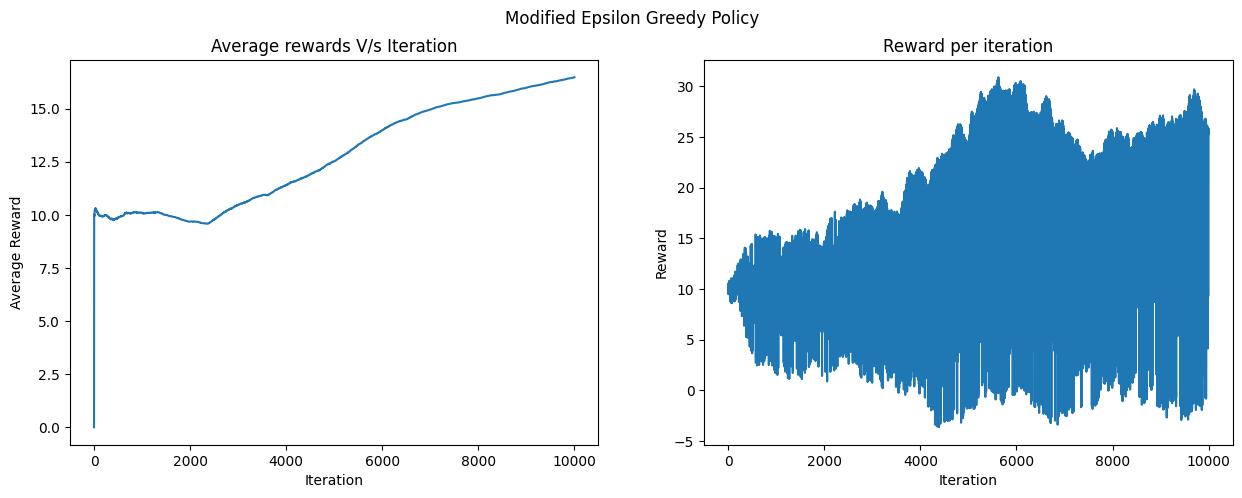

In [7]:
import matplotlib.pyplot as plt
# display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(R_avg)
ax1.title.set_text("Average rewards V/s Iteration")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Average Reward")
ax2.plot(R)
ax2.title.set_text("Reward per iteration")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Reward")
fig.suptitle("Modified Epsilon Greedy Policy")